## INFORME SOBRE ESTACIONALIDAD EN EL CONSUMO DE LA ELECTRICIDAD EN ESPAÑA
 
  
#### Autor: Daniel Oto-Peralías 
#### Fecha: 23/11/2021

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.x13 import x13_arima_analysis
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

In [2]:
# Datos
path="C:/Users/danie/Dropbox/ECO/TEACHING/2021-2022/CyP/T3/Informe2/"
datos=path+"electricidad.xlsx"
df = pd.read_excel(datos)
df['PERIODO'] = pd.to_datetime(df['PERIODO'], format='%Y%m')
df.set_index(keys="PERIODO",inplace=True)

In [3]:
#Seleccionamos periodo
df=df["1960":"2019"]

### 1. Desestacionalización con el método de descomposición clásica

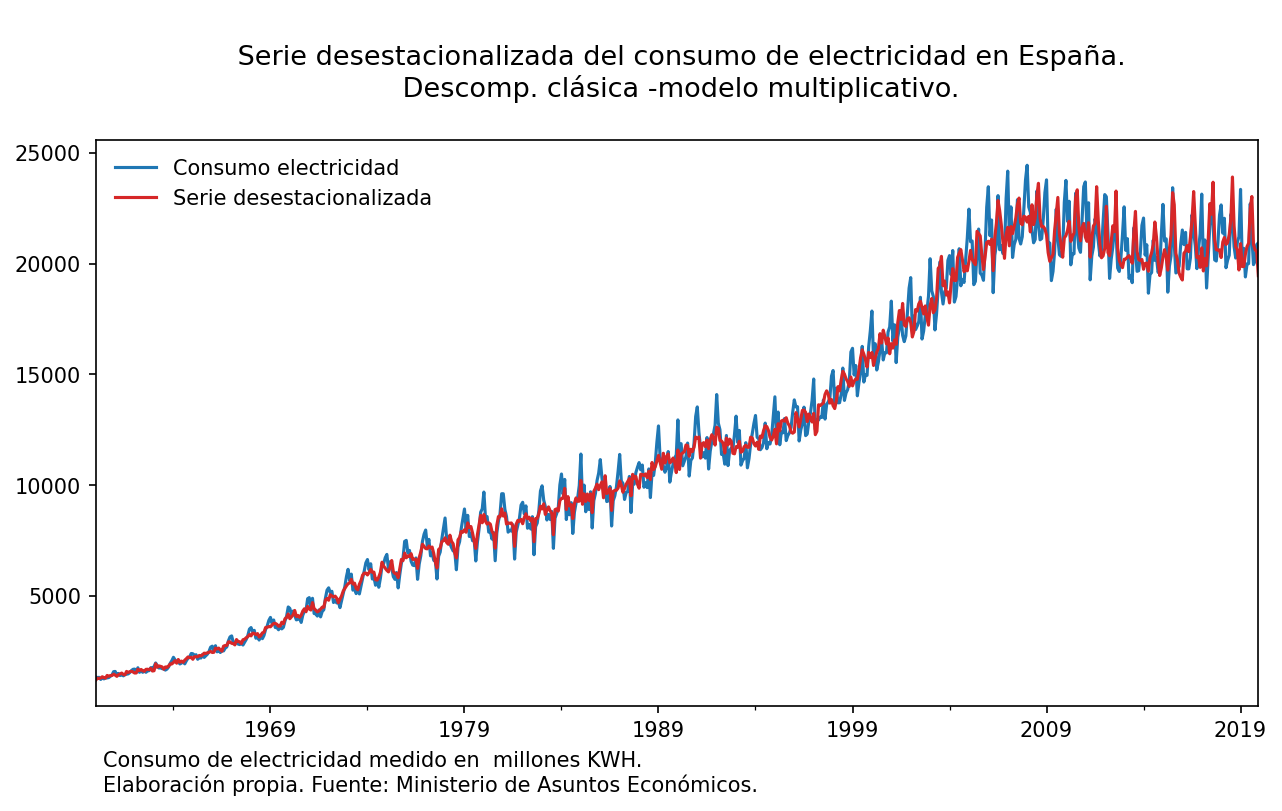

In [4]:
result = seasonal_decompose(df, model="multiplicative")
desestac=df.ELECTRIC/result.seasonal
fig,ax=plt.subplots(figsize=(10,5),dpi=150)
df.ELECTRIC.plot(label="Consumo electricidad", color="tab:blue", ax=ax)
desestac.plot(ax=ax,label="Serie desestacionalizada", color="tab:red")
ax.legend(frameon=False)
ax.set_xlabel("")
ax.set_title("\n Serie desestacionalizada del consumo de electricidad en España.\n Descomp. clásica -modelo multiplicativo.\n", size=13)
fig.text(0.13,0.01,"Consumo de electricidad medido en  millones KWH. \nElaboración propia. Fuente: Ministerio de Asuntos Económicos.", ha="left",fontsize=10 ) 
plt.show()

### 2. Desestacionalización con el método de descomposición STL

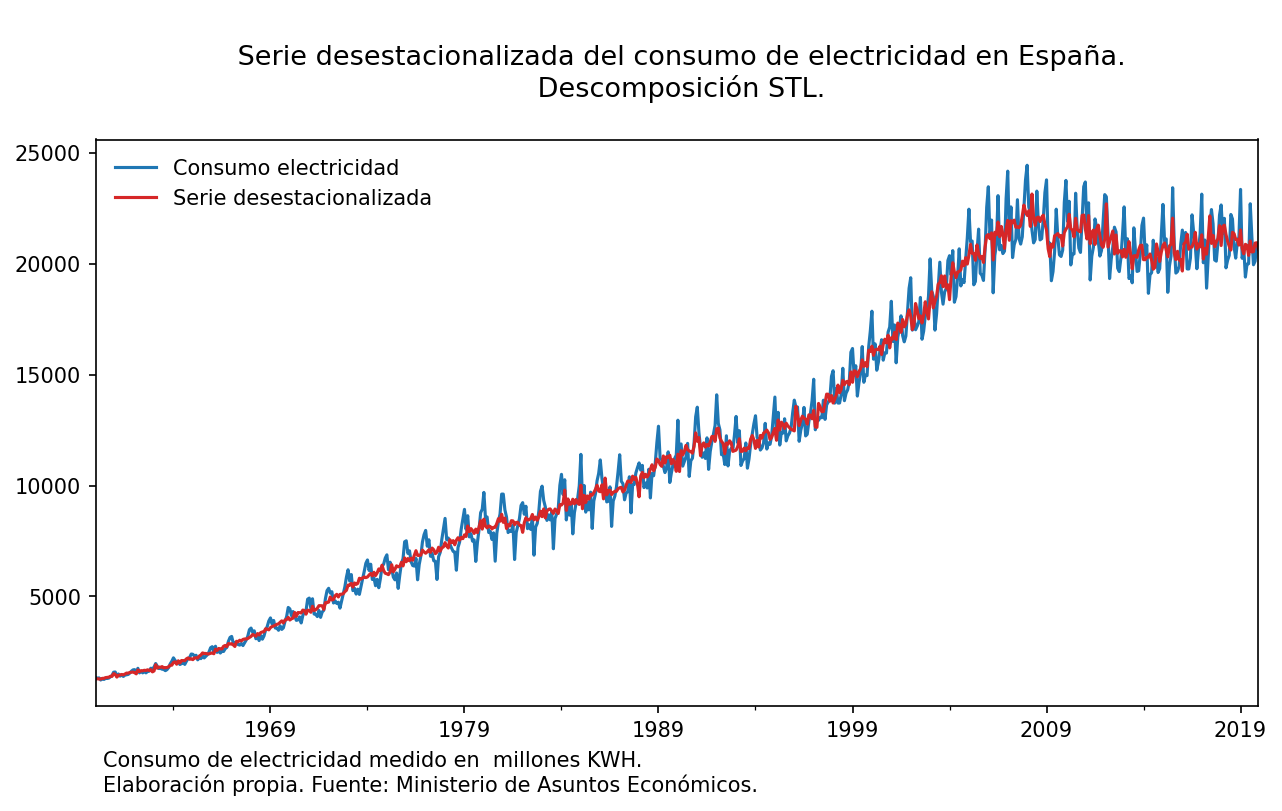

In [5]:
result = STL(df,seasonal=13, robust=False).fit() 
desestac=df.ELECTRIC-result.seasonal
fig,ax=plt.subplots(figsize=(10,5),dpi=150)
df.ELECTRIC.plot(label="Consumo electricidad", color="tab:blue", ax=ax)
desestac.plot(ax=ax,label="Serie desestacionalizada", color="tab:red")
ax.legend(frameon=False)
ax.set_xlabel("")
ax.set_title("\n Serie desestacionalizada del consumo de electricidad en España.\n Descomposición STL.\n", size=13)
fig.text(0.13,0.01,"Consumo de electricidad medido en  millones KWH. \nElaboración propia. Fuente: Ministerio de Asuntos Económicos.", ha="left",fontsize=10 ) 
plt.show()

### 3. Desestacionalización con el método de descomposición X13ARIMA-SEATS

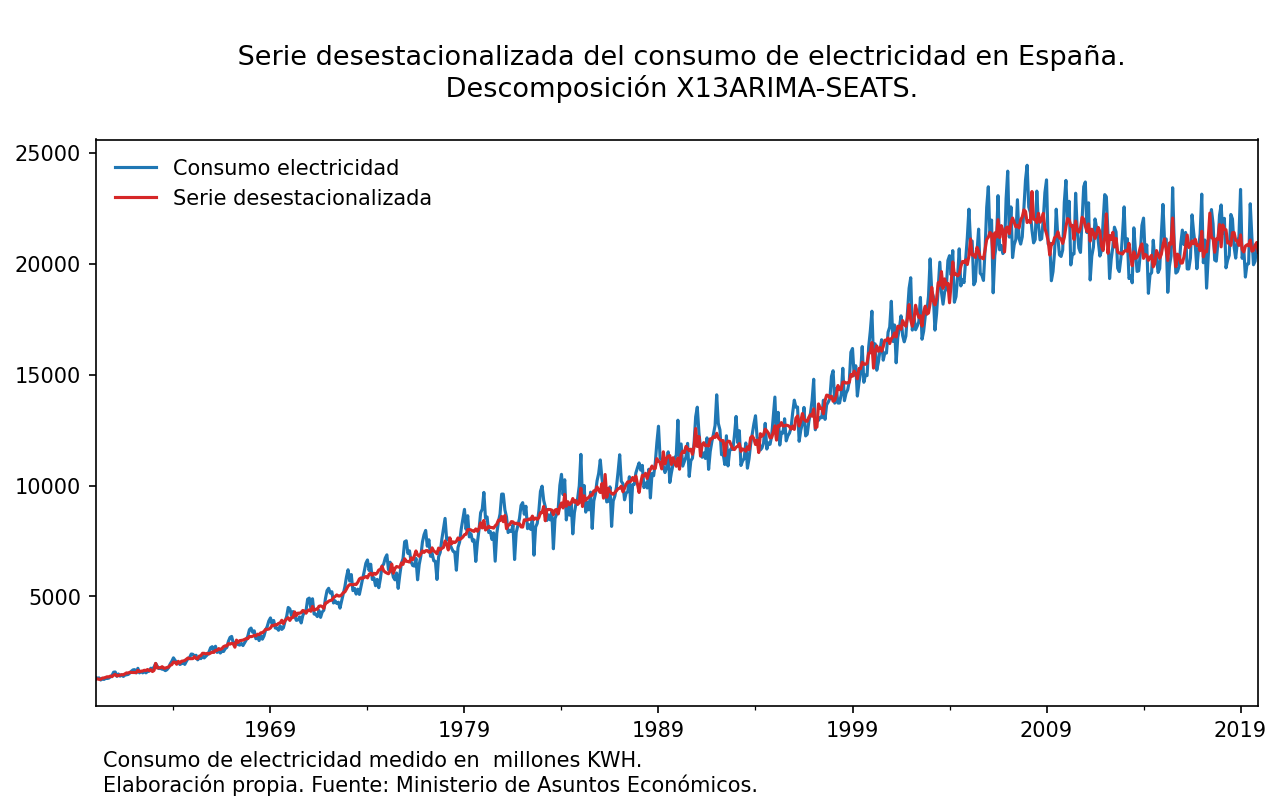

In [6]:
XPATH=os.chdir(r"C:/WinX13/x13as")
result = x13_arima_analysis(endog = df.ELECTRIC,x12path=XPATH,trading=True)
desestac=result.seasadj
fig,ax=plt.subplots(figsize=(10,5),dpi=150)
df.ELECTRIC.plot(label="Consumo electricidad", color="tab:blue", ax=ax)
desestac.plot(ax=ax,label="Serie desestacionalizada", color="tab:red")
ax.legend(frameon=False)
ax.set_xlabel("")
ax.set_title("\n Serie desestacionalizada del consumo de electricidad en España.\n Descomposición X13ARIMA-SEATS.\n", size=13)
fig.text(0.13,0.01,"Consumo de electricidad medido en  millones KWH. \nElaboración propia. Fuente: Ministerio de Asuntos Económicos.", ha="left",fontsize=10 ) 
plt.show()

###    
### 4. Análisis de la evolución del comportamiento estacional del consumo de electricidad en España

In [7]:
# Dividimos la muestra en cuatro periodos de 15 años
df1=df["1960":"1974"]  
df2=df["1975":"1989"]
df3=df["1990":"2004"]
df4=df["2005":"2019"]

result1 = x13_arima_analysis(endog = df1.ELECTRIC,x12path=XPATH,trading=True)
result2 = x13_arima_analysis(endog = df2.ELECTRIC,x12path=XPATH,trading=True)
result3 = x13_arima_analysis(endog = df3.ELECTRIC,x12path=XPATH,trading=True)
result4 = x13_arima_analysis(endog = df4.ELECTRIC,x12path=XPATH,trading=True)

s1=df1.ELECTRIC-result1.seasadj
s2=df2.ELECTRIC-result2.seasadj
s3=df3.ELECTRIC-result3.seasadj
s4=df4.ELECTRIC-result4.seasadj

#Calculamos, para cada periodo, la media del componente estacional de cada mes:
S1=s1.to_frame().reset_index()
S1['mes']=pd.DatetimeIndex(S1.PERIODO).month
S1=S1.groupby(by='mes').mean()

S2=s2.to_frame().reset_index()
S2['mes']=pd.DatetimeIndex(S2.PERIODO).month
S2=S2.groupby(by='mes').mean()

S3=s3.to_frame().reset_index()
S3['mes']=pd.DatetimeIndex(S3.PERIODO).month
S3=S3.groupby(by='mes').mean()

S4=s4.to_frame().reset_index()
S4['mes']=pd.DatetimeIndex(S4.PERIODO).month
S4=S4.groupby(by='mes').mean()

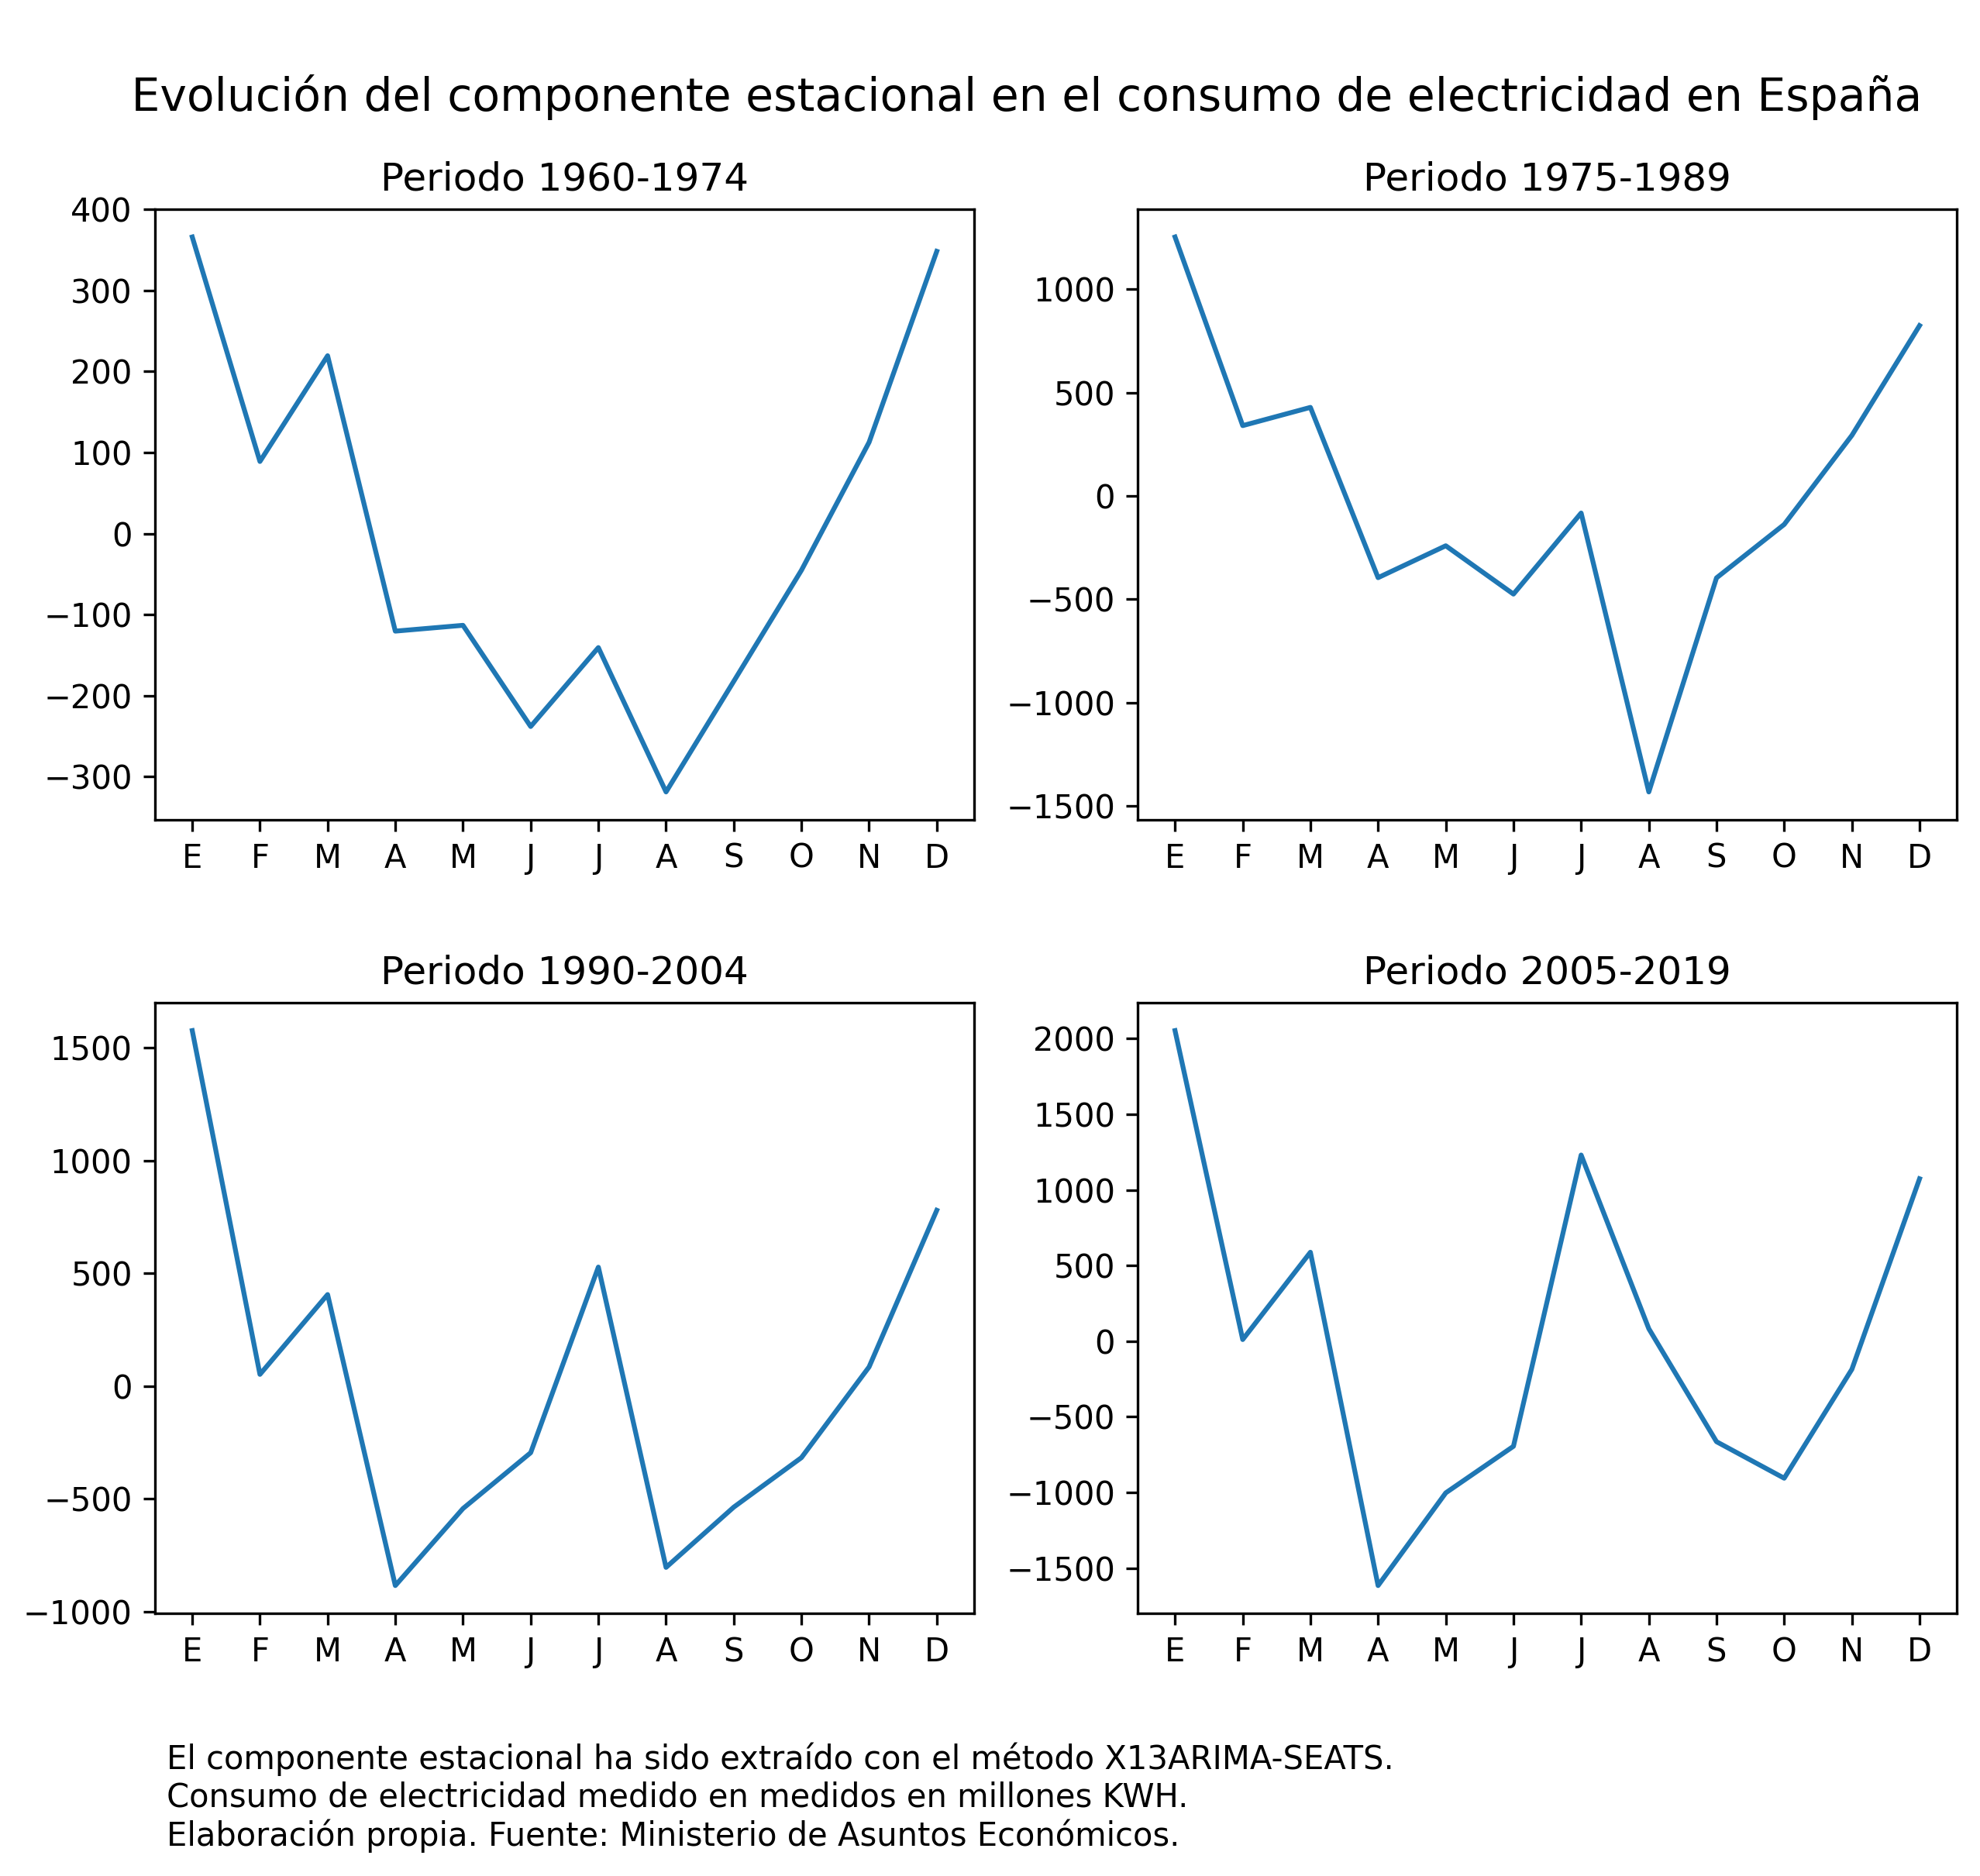

In [8]:
#Creamos la figura
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, figsize=(10,8),dpi=300)
g=globals()
for x in range(1,5):
    x=str(x)
    g["S"+x].plot(ax=g["ax"+x],color="tab:blue",legend=False)
    g["ax"+x].set_xlabel("")
    g["ax"+x].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    g["ax"+x].set_xticklabels(["E", "F", "M", "A", "M", "J", "J", "A","S","O","N","D"])
ax1.set_title("Periodo 1960-1974")
ax2.set_title("Periodo 1975-1989")
ax3.set_title("Periodo 1990-2004")
ax4.set_title("Periodo 2005-2019")
plt.subplots_adjust(hspace=0.3)
fig.suptitle("\n Evolución del componente estacional en el consumo de electricidad en España \n", size=14)
fig.text(0.13,0.00,"El componente estacional ha sido extraído con el método X13ARIMA-SEATS. \nConsumo de electricidad medido en medidos en millones KWH. \nElaboración propia. Fuente: Ministerio de Asuntos Económicos.", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()


# Notar que sin el bucle anterior, la misma figura requiere muchas más líneas de código:
# Esta figura no se muestra en el output y pongo el "if" precisamente para eso:
if 1==2:
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, figsize=(10,8),dpi=300)
    S1.plot(ax=ax1,color="tab:blue",legend=False)
    S2.plot(ax=ax2,color="tab:blue",legend=False)
    S3.plot(ax=ax3,color="tab:blue",legend=False)
    S4.plot(ax=ax4,color="tab:blue",legend=False)
    ax1.set_xlabel("")
    ax2.set_xlabel("")
    ax3.set_xlabel("")
    ax4.set_xlabel("")
    ax1.set_title("Periodo 1960-1974")
    ax2.set_title("Periodo 1975-1989")
    ax3.set_title("Periodo 1990-2004")
    ax4.set_title("Periodo 2005-2019")
    ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax1.set_xticklabels(["E", "F", "M", "A", "M", "J", "J", "A","S","O","N","D"])
    ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax2.set_xticklabels(["E", "F", "M", "A", "M", "J", "J", "A","S","O","N","D"])
    ax3.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax3.set_xticklabels(["E", "F", "M", "A", "M", "J", "J", "A","S","O","N","D"])
    ax4.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax4.set_xticklabels(["E", "F", "M", "A", "M", "J", "J", "A","S","O","N","D"])
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle("\n Evolución del componente estacional en el consumo de electricidad en España \n", size=14)
    fig.text(0.13,0.00,"El componente estacional ha sido extraído con el método X13ARIMA-SEATS. \nConsumo de electricidad medido en medidos en millones KWH. \nElaboración propia. Fuente: Ministerio de Asuntos Económicos.", ha="left",fontsize=10 ) # ha=horizontalalignment
    plt.show()

#### NOTA:
En la figura anterior se observa que el componente estacional ha variado considerablemente en este periodo de sesenta años.

Si comparamos en primer periodo (1960-1974) con el último (2005-2019), pasamos de un patrón estacional con un consumo elevado en invierno y reducido en verano, a otro con consumos elevados tanto en invierno como en verano.

Si bien pueden existir varios factores detrás de este cambio en el patrón estacional, el más relevante probablemente es la generalización del uso del aire acondicionado en verano.

In [9]:
# Última celda del notebook
# 1. Guardar esta última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP")
os.system("jupyter nbconvert Tema3_Informe2-Cosumo_Elec.ipynb --to html --no-input --no-prompt ")

<IPython.core.display.Javascript object>

0